<a href="https://colab.research.google.com/github/cardstud/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/TD_DSPT3_WarmUp_9_17_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DSPT3 Warm Up

## All questions in this code challenge refer to the dataframe below.

                                                                                .

In [0]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/ValerieLangat/CC-DSPT3/master/Cars%20-%20Sheet1.csv')

## Question 1:
### Find the max and min values of the passengers column *without* using df.describe()

In [0]:
df.head(1)

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Lenth,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,4,1.8,140,6300,2890,Yes,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra


In [0]:
df['Passengers'].max()

8

In [0]:
df['Passengers'].min()

2

                                                                                                                      .

## Question 2:
### Using the same dataset, create both a crosstab and a pivot table. When might one be better to use than the other?

In [0]:
#Crosstab of Passengers vs Manufacturer


In [0]:
price = pd.crosstab(df['Passengers'], df['Manufacturer'])
price

Manufacturer,Acura,Audi,BMW,Buick,Cadillac,Chevrolet,Chrylser,Chrysler,Dodge,Eagle,Ford,Geo,Honda,Hyundai,Infiniti,Lexus,Lincoln,Mazda,Mercedes-Benz,Mercury,Mitsubishi,Nissan,Oldsmobile,Plymouth,Pontiac,Saab,Saturn,Subaru,Suzuki,Toyota,Volkswagen,Volvo
Passengers,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,1,0,0,1,0,3,2,3,1,0,1,0,1,0,1,0,0,0,1,2,0,0,1,1,1,2,0
5,2,1,0,1,1,2,0,0,2,1,3,0,0,3,1,1,0,2,2,1,2,3,2,0,2,1,1,2,0,2,1,2
6,0,1,0,3,1,2,1,2,2,1,1,0,0,0,0,0,2,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
7,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0
8,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
# Pivot table

In [0]:
df.pivot_table('Price', index='Passengers', columns='Cylinders')

Cylinders,3,4,5,6,8,rotary
Passengers,,,,,,
2,NaN,NaN,NaN,NaN,38.000,32.5
4,8.466667,14.166667,NaN,23.420000,NaN,NaN
5,NaN,14.510714,26.7,28.040000,44.000,NaN
6,NaN,15.260000,NaN,25.422222,27.625,NaN
7,NaN,22.700000,19.7,18.816667,NaN,NaN
8,NaN,NaN,NaN,16.600000,NaN,NaN


In [0]:
# Just another pivot table
df.pivot_table('Price', index='MPG.city', columns='MPG.highway')

MPG.highway,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,36,37,38,41,43,46,50
MPG.city,,,,,,,,,,,,,,,,,,,,,,
15,18.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,NaN,NaN,NaN,NaN,NaN,32.833333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,NaN,19.35,47.9,19.100000,NaN,35.250000,26.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,NaN,NaN,22.7,23.666667,24.75,28.600000,28.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,NaN,NaN,NaN,NaN,NaN,61.900000,26.30,22.4,19.740000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,NaN,NaN,NaN,NaN,NaN,NaN,29.10,13.9,21.466667,31.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,NaN,NaN,NaN,NaN,NaN,NaN,21.50,15.6,22.700000,15.9,20.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.3,NaN,14.7,30.000000,15.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,NaN,NaN,NaN,NaN,NaN,NaN,14.10,NaN,15.800000,11.3,14.666667,13.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
# In general, use a pivot_table if you already have a DataFrame so you don't have the additional overhead of creating the same DataFrame again.
#      If you're starting from an array-like objects and are only concerened with pivoted data, use crosstab. 
#      The pivot table does not have the normalize argument, so if you want to normalize data, use crosstab

# Crosstabs let you quickly compare, contrast and otherwise asses info based on the variables you choose. If you wanted to do a more deeper analysis, you would need to go back to the beginning and generate
#     new reports with new variables to show the new data you want to view. With pivot tables, you can do those actiosn right on the table itself.

# While pivot tables may display the same data as crosstabls, pivot tables let you drag, drop and rearrange data to create additional reports right on the spot

# A single pivot table provides the foundation for any number of different ways of lookingt at the available data, all by simply manipulationg the table as desired. White some crosstab software may provide
#     advandced features in crosstab reports, pivot tables still tend to come packed with greater number capabilities.

                                                                      .

## Question 3: 
### Let's practice some filtering. In our main dataframe, which manufacturer, model and type of car has the highest reported Price? (hint: checkout df.loc)

### What is the exact row and column number of the cell containing the highest reported Price? Please print that value.


In [0]:
import numpy as np
df.groupby('Price').aggregate({'Manufacturer': 'max', 'Model': 'max', 'Type':'max'}, ascending=True)

,Manufacturer,Model,Type
Price,,,
7.4,Ford,Festiva,Small
8.0,Hyundai,Excel,Small
8.3,Mazda,323,Small
8.4,Subaru,Metro,Small
8.6,Suzuki,Swift,Small
9.0,Pontiac,LeMans,Small
9.1,Volkswagen,Fox,Small
9.2,Dodge,Colt,Small
9.8,Toyota,Tercel,Small


In [0]:
def filter_func(x):
  return x['Price'].max()

he = ('df', "df.groupby('Manufacturer').max()", "df.groupby('Model').max()", "df.grouby('Type').max()")
he

('df',
 "df.groupby('Manufacturer').max()",
 "df.groupby('Model').max()",
 "df.grouby('Type').max()")

In [0]:
df.max()

Manufacturer              Volvo
Model                    Vision
Type                        Van
Min.Price                  45.4
Price                      61.9
Max.Price                    80
MPG.city                     46
MPG.highway                  50
AirBags                    None
DriveTrain                 Rear
Cylinders                rotary
EngineSize                  5.7
Horsepower                  300
RPM                        6500
Rev.per.mile               3755
Man.trans.avail             Yes
Fuel.tank.capacity           27
Passengers                    8
Lenth                       219
Wheelbase                   119
Width                        78
Turn.circle                  45
Rear.seat.room               36
Luggage.room                 22
Weight                     4105
Origin                  non-USA
Make                  Volvo 850
dtype: object

                                                  .

## Question 4: 
### Get creative! Use any library you'd like to practice making plots. If you have extra time, try to incorporate color or something cool you've found that we haven't reviewed in class yet. Have fun with this and let's get some volunteers to show off their creations :) 



In [0]:
import seaborn as sns


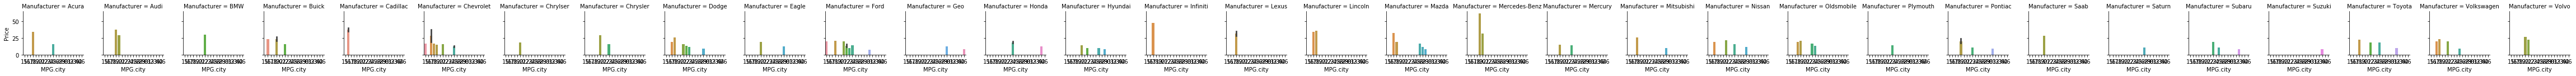

In [0]:
sns.catplot(x='MPG.city', y='Price', col='Manufacturer', kind='bar', data=df, height=2)